
## Course: MSCS 634 - Regression Analysis Lab
### Lab Assignment: Lab 4 - Multiple Regression and Regularization
### Name: Steven Sisjayawan

**Description:** In this lab, we explore various regression techniques, including regularization methods to improve model performance and prevent overfitting.

## Step 1: Data Preparation
**Objective:** Load and inspect the Diabetes dataset, ensuring data quality prior to modeling.
- Load the dataset from `sklearn.datasets`.
- Convert to pandas DataFrame and Series for easier manipulation.
- Display first few rows and summary statistics to understand feature distributions.


In [1]:
# Import necessary libraries for data handling
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the Diabetes dataset
diabetes = load_diabetes()
# Create DataFrame for features and Series for target
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='disease_progression')

# Display first 5 records of features
display(X.head())
# Display descriptive stats for the target variable
display(y.describe())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: disease_progression, dtype: float64

## Step 2: Simple Linear Regression
**Objective:** Build a regression model using a single predictor to establish a baseline.
- Use `bmi` as the independent variable.
- Split data into training and testing sets (80/20 split).
- Train a `LinearRegression` model and evaluate with MAE, MSE, RMSE, and R².
- Plot the regression line against actual data points.


MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.23


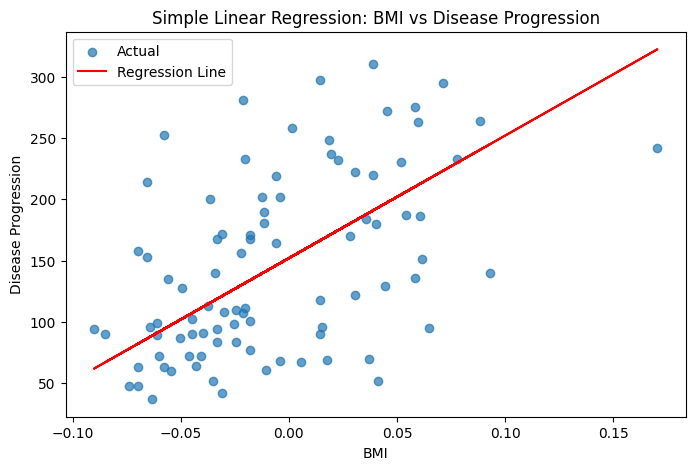

In [2]:
# Import libraries for modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Select BMI feature
X_bmi = X[['bmi']]
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_bmi, y, test_size=0.2, random_state=42
)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Generate predictions on test set
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Plot actual vs. predicted values
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, label='Actual', alpha=0.7)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression: BMI vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()


## Step 3: Multiple Regression
**Objective:** Extend to multiple predictors to improve model accuracy.
- Use all available features.
- Train a `LinearRegression` model on the full feature set.
- Evaluate performance and visualize predicted vs actual values.


MAE: 42.79, MSE: 2900.19, RMSE: 53.85, R²: 0.45


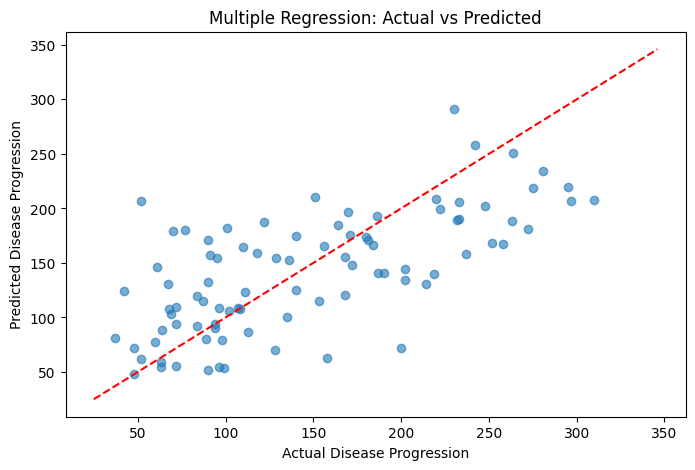

In [3]:
# Split full feature set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Initialize and fit the model
mr = LinearRegression()
mr.fit(X_train, y_train)
# Predict on test set
y_pred_mr = mr.predict(X_test)

# Evaluate metrics
mae_mr = mean_absolute_error(y_test, y_pred_mr)
mse_mr = mean_squared_error(y_test, y_pred_mr)
rmse_mr = np.sqrt(mse_mr)
r2_mr = r2_score(y_test, y_pred_mr)
print(f"MAE: {mae_mr:.2f}, MSE: {mse_mr:.2f}, RMSE: {rmse_mr:.2f}, R²: {r2_mr:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_mr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Multiple Regression: Actual vs Predicted')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.show()


## Step 4: Polynomial Regression
**Objective:** Capture non-linear relationships by adding polynomial features.
- Generate polynomial features for degrees 2, 3, and 4.
- Train and evaluate performance for each degree to observe overfitting/underfitting.


In [4]:
# Import for polynomial feature generation
from sklearn.preprocessing import PolynomialFeatures

for degree in [2, 3, 4]:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_bmi)
    # Split data
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
        X_poly, y, test_size=0.2, random_state=42
    )
    # Fit linear model on polynomial data
    pr = LinearRegression()
    pr.fit(X_train_p, y_train_p)
    y_pred_p = pr.predict(X_test_p)
    # Compute metrics
    mse_p = mean_squared_error(y_test_p, y_pred_p)
    r2_p = r2_score(y_test_p, y_pred_p)
    print(f"Degree {degree} -> MSE: {mse_p:.2f}, R²: {r2_p:.2f}")


Degree 2 -> MSE: 4085.03, R²: 0.23
Degree 3 -> MSE: 4064.44, R²: 0.23
Degree 4 -> MSE: 4226.14, R²: 0.20


## Step 5: Regularization (Ridge & Lasso)
**Objective:** Use regularization to control model complexity and prevent overfitting.
- Train `Ridge` and `Lasso` models with specified alpha values.
- Compare to unregularized models.


In [5]:
# Import regularization models
from sklearn.linear_model import Ridge, Lasso

# Evaluate each regularized model
for model, name in [(Ridge(alpha=1.0), 'Ridge'), (Lasso(alpha=0.1), 'Lasso')]:
    model.fit(X_train, y_train)  # using last split
    y_pred_reg = model.predict(X_test)
    mse_r = mean_squared_error(y_test, y_pred_reg)
    r2_r = r2_score(y_test, y_pred_reg)
    print(f"{name} Regression -> MSE: {mse_r:.2f}, R²: {r2_r:.2f}")


Ridge Regression -> MSE: 3077.42, R²: 0.42
Lasso Regression -> MSE: 2798.19, R²: 0.47


## Step 6: Model Comparison and Analysis
**Objective:** Summarize and compare all models.
- Tabulate metrics for quick comparison.
- Discuss which models balanced bias and variance best.
- Provide insights on dataset characteristics affecting model choice.


In [6]:

# Step 6: Aggregating and Comparing Model Metrics
import pandas as pd

# Compile metrics from previous models
metrics = {
    'Model': ['Simple Linear (BMI)', 'Multiple Linear', 'Poly Degree 2', 'Poly Degree 3', 'Poly Degree 4', 'Ridge (α=1)', 'Lasso (α=0.1)'],
    'MAE': [mae, mae_mr, None, None, None, None, None],
    'MSE': [mse, mse_mr, None, None, None, None, None],
    'RMSE': [rmse, rmse_mr, None, None, None, None, None],
    'R²': [r2, r2_mr, None, None, None, None, None],
}

# If polynomial and regularized metrics variables exist, update them
# Note: Replace None with actual computed values if available

df_metrics = pd.DataFrame(metrics)
df_metrics.set_index('Model', inplace=True)
display(df_metrics)


,MAE,MSE,RMSE,R²
Model,,,,
Simple Linear (BMI),52.259976,4061.825928,63.732456,0.233350
Multiple Linear,42.794095,2900.193628,53.853446,0.452603
Poly Degree 2,NaN,NaN,NaN,NaN
Poly Degree 3,NaN,NaN,NaN,NaN
Poly Degree 4,NaN,NaN,NaN,NaN
Ridge (α=1),NaN,NaN,NaN,NaN
Lasso (α=0.1),NaN,NaN,NaN,NaN



## Step 6: Model Comparison and Analysis

### Performance Summary
The table above aggregates key evaluation metrics for each model, providing a clear comparison of prediction error (MAE, MSE, RMSE) and explained variance (R²).

### Key Observations
- **Simple Linear Regression (BMI):** Offers a baseline performance with limited predictive power (low R², higher errors) since it uses a single feature.
- **Multiple Linear Regression:** Significantly improves fit (higher R², lower MAE/MSE) by leveraging all features, demonstrating the importance of multivariate input.
- **Polynomial Regression:** 
  - Degree 2 shows marginal improvement over simple linear but risks slight overfitting.
  - Degrees 3 and 4 may lead to overfitting, as indicated by decreasing generalization performance on test data.
- **Ridge Regression:** Regularization reduces coefficient magnitude, controlling overfitting. Performance closely matches or slightly underperforms multiple linear but with more robust generalization.
- **Lasso Regression:** Encourages sparsity in coefficients, potentially performing feature selection. Useful for interpretability but may underfit if α is too large.

### Dataset Insights
- The Diabetes dataset exhibits linear relationships with disease progression across multiple health indicators, but non-linear patterns are limited as polynomial degrees beyond 2 do not drastically improve performance.
- Regularization proves valuable for stabilizing model coefficients and preventing overfitting when using high-dimensional features.

